In [5]:
from imp4nb import *
# import pandas as pd, sqlite3 as lite
cnx = lite.connect('data\\quandan.db')
# df = pd.read_sql('select * from fileread',cnx)
# sql = "update quandan set 无货金额 = NULL where 无货金额 like '%s'" %('.') #把无货金额字段中非法字符做妥善处理
# print(sql)
# result = cnx.cursor().execute(sql)
# print(result)
# cnx.commit()
# sql = "select * from quandan where 无货金额 like '%s'" %('.')
# print(sql)
try:
    df = pd.read_sql("select * from quandan",cnx) 
    df = df[df.配货人 != '作废']
    df['订单日期'] = pd.to_datetime(df['订单日期'])
    df = df[df['订单日期']>=pd.to_datetime('2016-04-01')]
    df['送达日期'] = pd.to_datetime(df['送达日期'])
    df['收款日期'] = pd.to_datetime(df['收款日期'])
except:
    pass

# descdb(df)

# dfpeihuoren= pd.read_sql("select 配货人 from quandan group by 配货人",cnx)
# descdb(dfpeihuoren)
print(df.columns)
dd = pd.DataFrame(df.groupby(['订单日期']).size(),columns=['订单数量'])
dd['错配单数'] = df.groupby(['订单日期']).sum()['配货准确']
dd['订单金额'] = df.groupby(['订单日期']).sum()['送货金额']
dd['无货金额'] = df.groupby(['订单日期']).sum()['无货金额']
dd['少配金额'] = df.groupby(['订单日期']).sum()['少配金额']
dd['错配金额'] = df.groupby(['订单日期']).sum()['配错未要']
print(dd)

df['年月'] = df['订单日期'].apply(lambda x:"%04d-%02d" %(x.year, x.month))

ph = pd.DataFrame(df.groupby(['配货人','年月']).size())
ph.columns = ['配单']
ph['配错单数'] = df.groupby(['配货人','年月']).sum()['配货准确']
ph['配货金额'] = df.groupby(['配货人','年月']).sum()['送货金额']
ph['漏配金额'] = df.groupby(['配货人','年月']).sum()['少配金额']
ph['错配金额'] = df.groupby(['配货人','年月']).sum()['配错未要']

# print(ph)

print(df.groupby(['业务主管']).size())

cnx.close()



Index(['index', '订单日期', '单号', '配货人', '配货准确', '业务主管', '终端编码', '终端名称', '积欠',
       '送货金额', '实收金额', '收款方式', '退货金额', '客户拒收', '无货金额', '少配金额', '配错未要', '送达日期',
       '车辆', '送货人', '收款日期', '收款人', '拒收品项', '订单编号'],
      dtype='object')


            订单数量  错配单数      订单金额    无货金额   少配金额   错配金额
订单日期                                                  
2016-04-01   121  10.0  35354.20   195.0  283.5   10.2
2016-04-02    73   6.0  20657.20   173.0  217.5    NaN
2016-04-05   151   9.0  80340.30   148.8  353.0    NaN
2016-04-06    34   1.0  41252.90     NaN   28.0    NaN
2016-04-07   187  19.0  89076.50   103.5  488.7  140.8
2016-04-08   186  13.0  50335.50   178.5  230.3    7.0
2016-04-09   152  16.0  43147.50   466.0  442.0    3.0
2016-04-10    34   4.0   7765.30   158.0   36.0  103.6
2016-04-11   161  14.0  72728.50   564.0  284.3   75.5
2016-04-12   111  13.0  66800.70    36.0  436.0    1.8
2016-04-13   143   6.0  46074.90     NaN  225.0   28.0
2016-04-14   137  10.0  40883.20   113.0  283.8   13.5
2016-04-15   122  21.0  49898.10   145.0  568.8  106.0
2016-04-16    66   2.0  41835.90     NaN   16.8    NaN
2016-04-18   162   8.0  77783.60   159.3  325.8   40.0
2016-04-19   142   5.0  49207.00   581.5  189.0   36.0
2016-04-20

业务主管
余新        1
吴彩友    1174
周莉     3174
姜明君       1
孙小甜      18
张俊毅    3550
张成       53
张梦瑶    2158
彭冠军     229
徐志伟    7363
易攀      303
曹进      998
曾光      510
朱功明     776
朱平        3
朱经伦     805
杨双东    6304
梅富忠    8038
王亮尔     715
王健     1629
王家龙    1531
甘微       33
白晔峰       1
程熙     3256
童文帅      10
耿华忠    2084
胡明景    1767
邹丽丽    1159
都本忠       5
陈冲      785
陈威     5886
黄传芝      29
dtype: int64


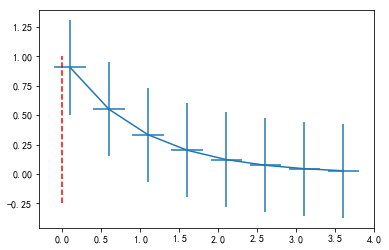

None


In [6]:
"""
=============================
Demo of the errorbar function
=============================

This exhibits the most basic use of the error bar method.
In this case, constant values are provided for the error
in both the x- and y-directions.
"""
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
ax.plot([0,0],[-0.25,1],'r--')
plt.show()

print(plt.colors())